In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

import sys
sys.path.insert(0, 'C:\\Users\jedra\\Uni\AI-Master\Multi-objective-optimization\\fake-stock-predictions-challenge\src')

from helpers.data_loader import load_data, to_dataframe
from fortune_tellers import get_preds_dataframes, plot_predicitons_with_train_data

In [2]:
data = load_data("../../res/assets_bundles/Bundle3")
df = to_dataframe(data)

In [3]:
periodic_kernel = kernels.ConstantKernel(1.0) * kernels.ExpSineSquared(length_scale=1, periodicity=100.0)
linear_kernel = kernels.ConstantKernel(1.0) * kernels.RBF(length_scale=1.0)
white_kernel = kernels.WhiteKernel(noise_level=1e-5)


kernel_ = [
    periodic_kernel + linear_kernel + white_kernel,
]

In [4]:
def gaussian_process_predictor(t, prices):
    X = np.array(t).reshape(-1, 1)
    y = np.array(prices).reshape(-1, 1)
    
    X_test = np.arange(len(X), len(X) + 100).reshape(-1, 1)

    model = GaussianProcessRegressor(kernel=kernel_[0])
    model.fit(X, y)

    return model.predict(X_test, return_std=False)


In [5]:
TRAIN_SIZE = 202
PREDICT_SIZE = 100

stocks = df.columns.drop("Time")

preds_train_df, preds_future_df = get_preds_dataframes(df, stocks, TRAIN_SIZE, PREDICT_SIZE, gaussian_process_predictor)    

C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find

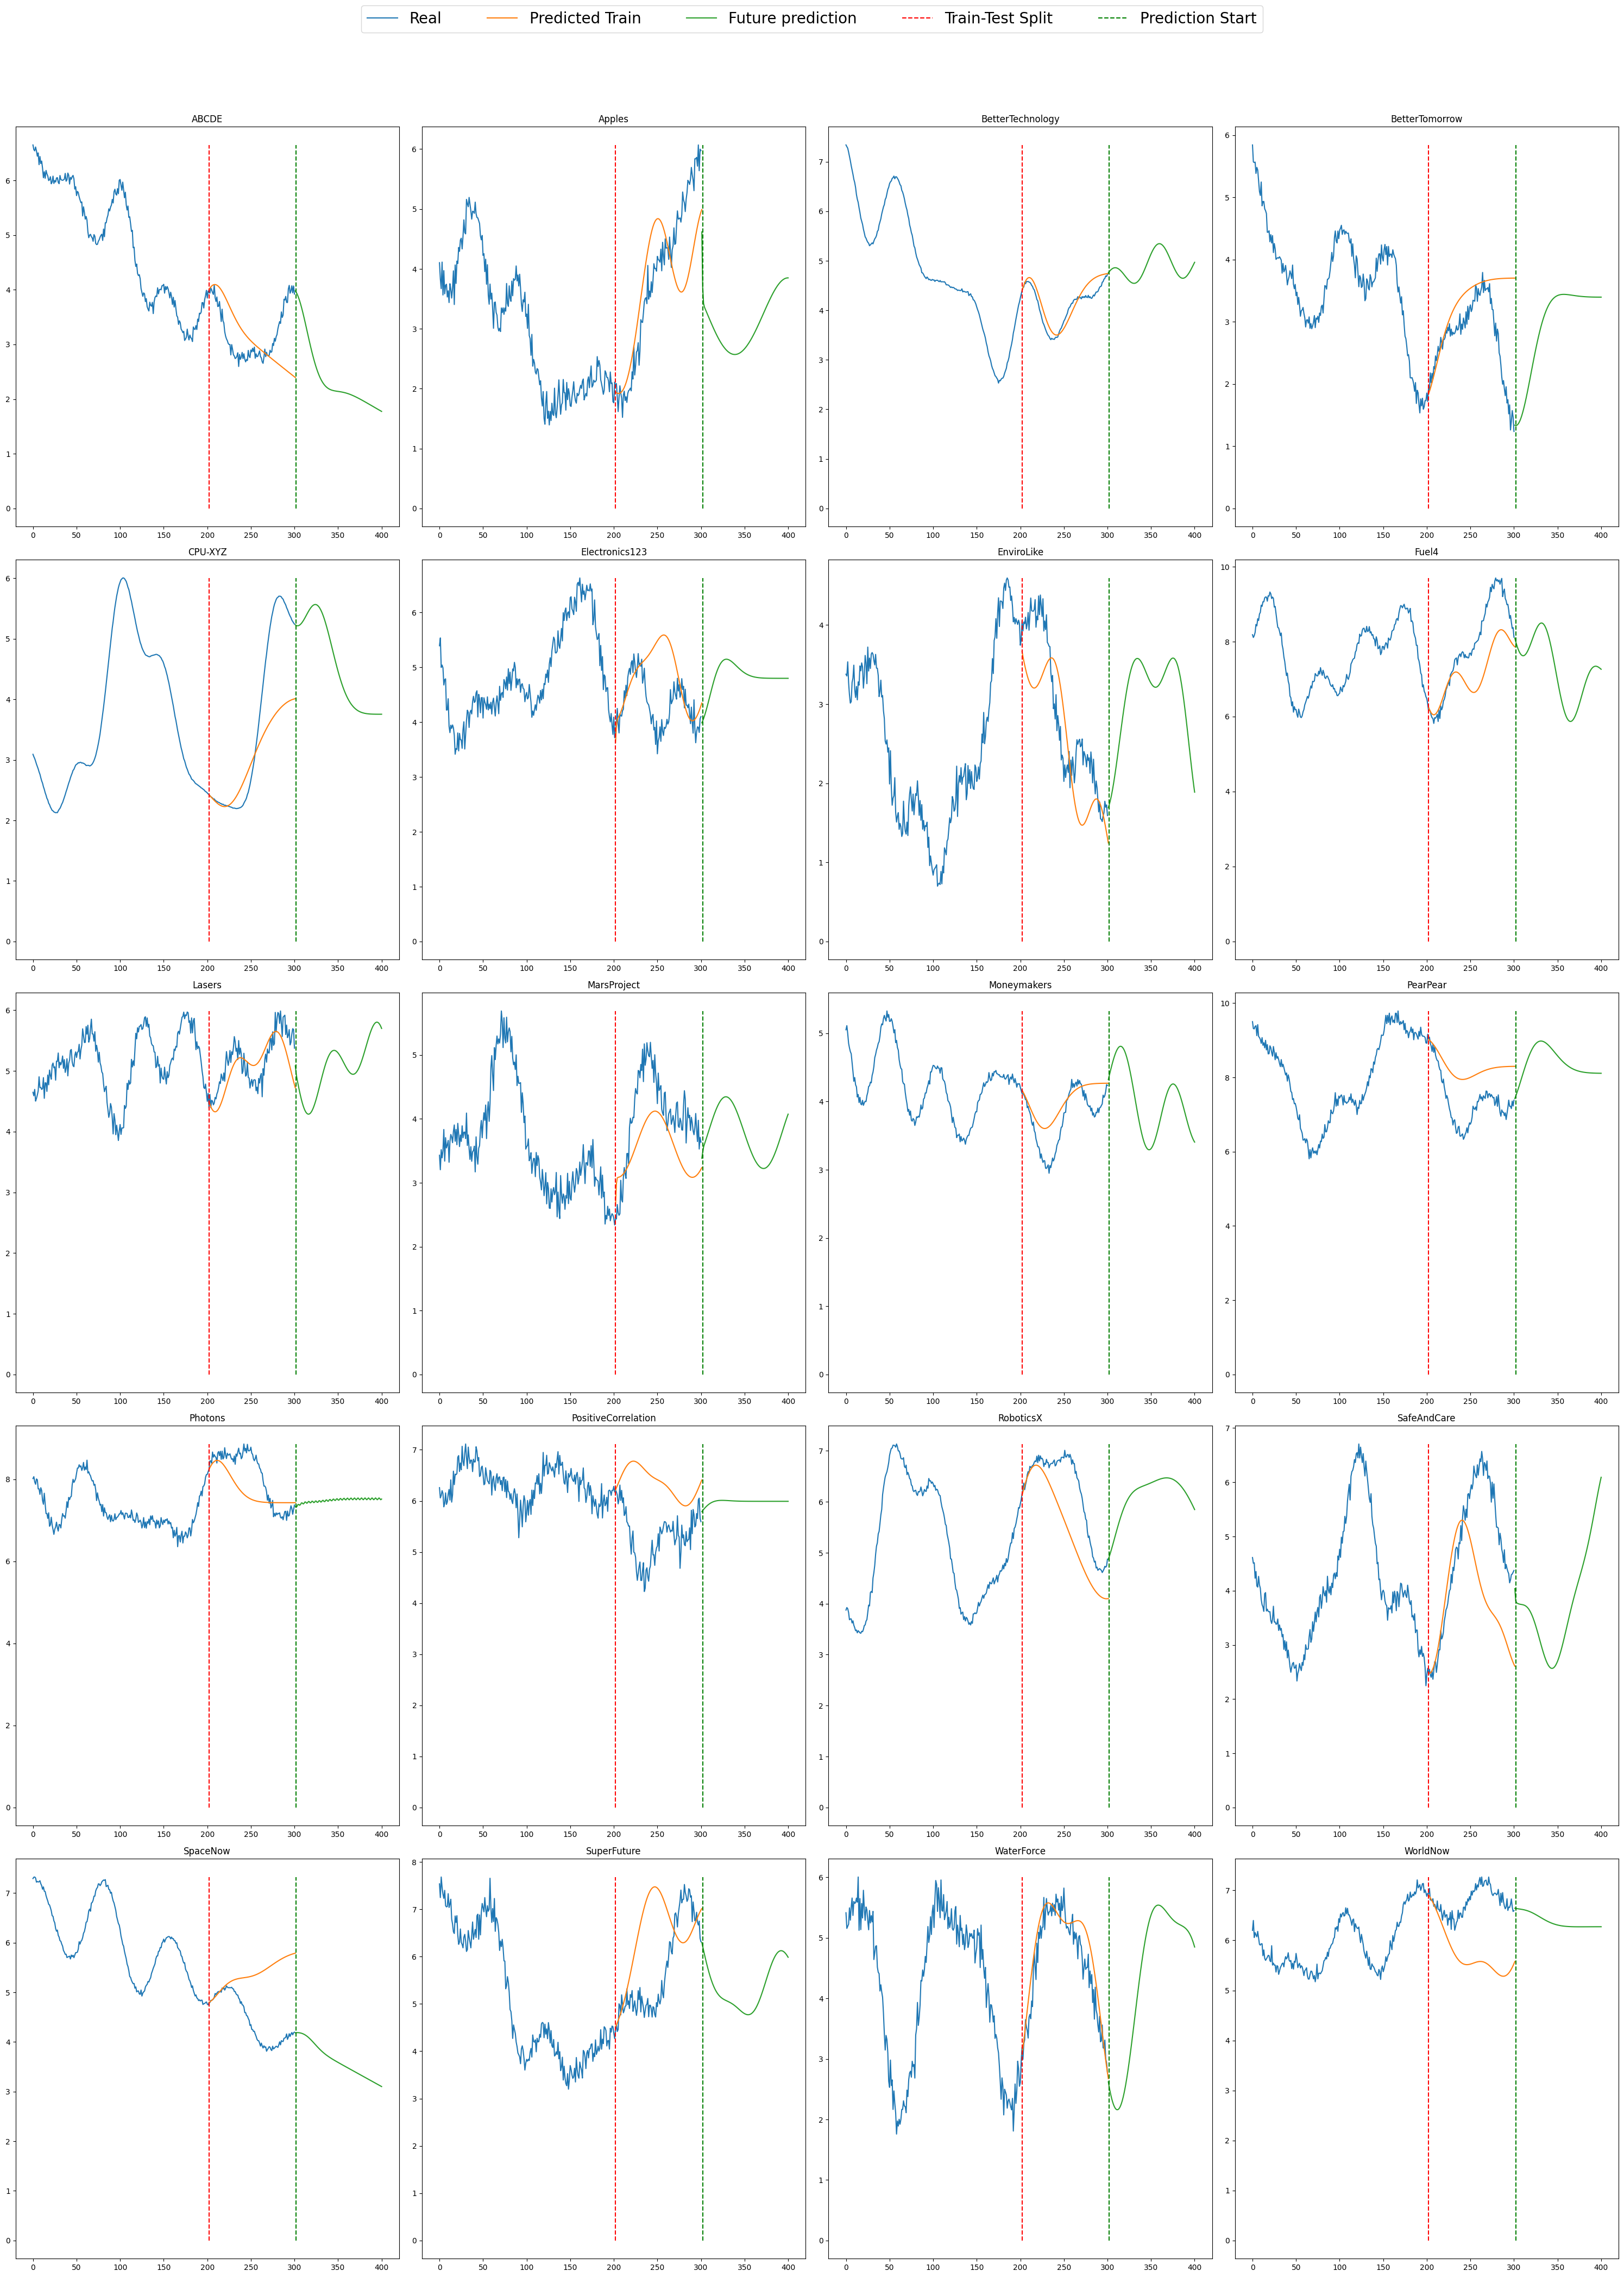

In [11]:
fig, axs = plt.subplots(5, 4, figsize=(30, 40))
axs = axs.ravel()

plot_predicitons_with_train_data(axs, stocks, df, preds_train_df, preds_future_df, TRAIN_SIZE, PREDICT_SIZE)

lgd, labels = axs[0].get_legend_handles_labels()
fig.legend(lgd, labels, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=5, columnspacing=3.0, labelspacing=0.0,
           fontsize=20)
plt.tight_layout()
plt.savefig("gaussian_process_predictions.png")
plt.show()